#### Step 1: Retrieve the Dataset

- Download the Wine Quality dataset from the UCI Machine Learning Repository. You can choose either the red or white wine dataset or combine both.
- Use pandas to load the dataset.
- Normalize the Dataset
- Use StandardScaler from sklearn.preprocessing to normalize the features.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Choose one or both datasets
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Combine datasets if needed
df = pd.concat([df_red, df_white], ignore_index=True)

# Inspect the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Normalize the dataset
scaler = StandardScaler()
features = df.drop('quality', axis=1)  # Assuming 'quality' is the target variable
normalized_features = scaler.fit_transform(features)

# Create a DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

## Step 2: Dimensionality Reduction & Visualization
- Apply PCA
- Use PCA to reduce the dataset to 2 or 3 principal components.
- Visualize the transformed data using scatter plots.
- Identify Variance Explained
- Calculate and discuss the variance explained by each principal component.

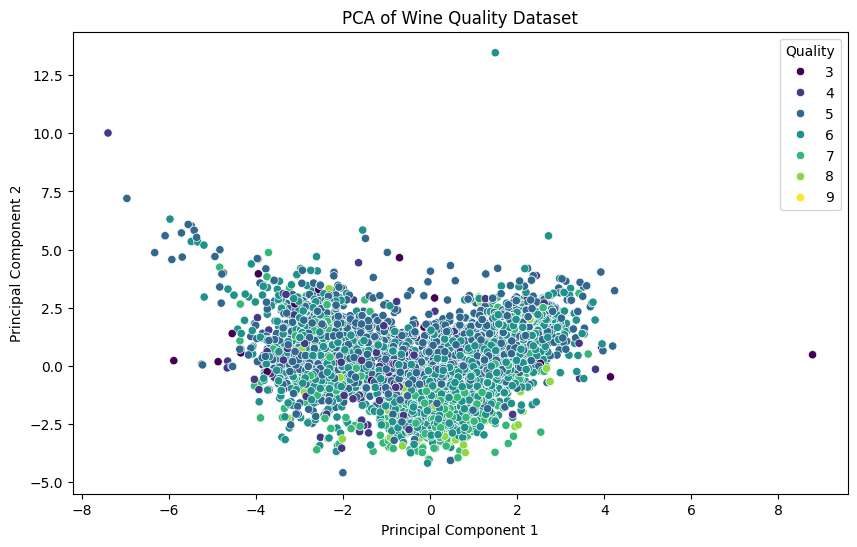

Explained variance by each principal component: [0.2754426  0.22671146]


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
pca = PCA(n_components=2)  # Change to 3 for 3D
pca_result = pca.fit_transform(normalized_df)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['quality'] = df['quality']  # Add the target variable for coloring

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=pca_df, palette='viridis')
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component: {explained_variance}')


## **Variance Explained by Each Principal Component**

The **explained variance** indicates how much of the total dataset variance is captured by each principal component. In our PCA analysis, we obtained the following explained variance values:




### **Interpretation**
- The **first principal component (PC1)** explains **27.54%** of the total variance in the dataset.
- The **second principal component (PC2)** explains **22.67%** of the total variance.
- Together, these two components **retain approximately 50.21% of the total variance** in the dataset.

### **Trade-off Between Dimensionality Reduction and Information Loss**
- While PCA effectively reduces the dataset from **high dimensions to 2D**, it **loses some variance** (information).
- If we were to include more principal components, we could **retain more variance** but at the cost of higher dimensionality.
- The goal is to **balance dimensionality reduction and data preservation**, ensuring that the transformed dataset still contains meaningful patterns.

### **Scree Plot Recommendation**
To further analyze the variance contribution of additional principal components, a **scree plot** (plotting the explained variance of each component) can be useful in determining the optimal number of components for retaining meaningful information.



## Step 3: Comparison with t-SNE
- Apply t-SNE
- Use t-SNE to obtain a 2D representation of the dataset.
- Compare Results
- Discuss the differences in interpretability and clustering between PCA and t-SNE.

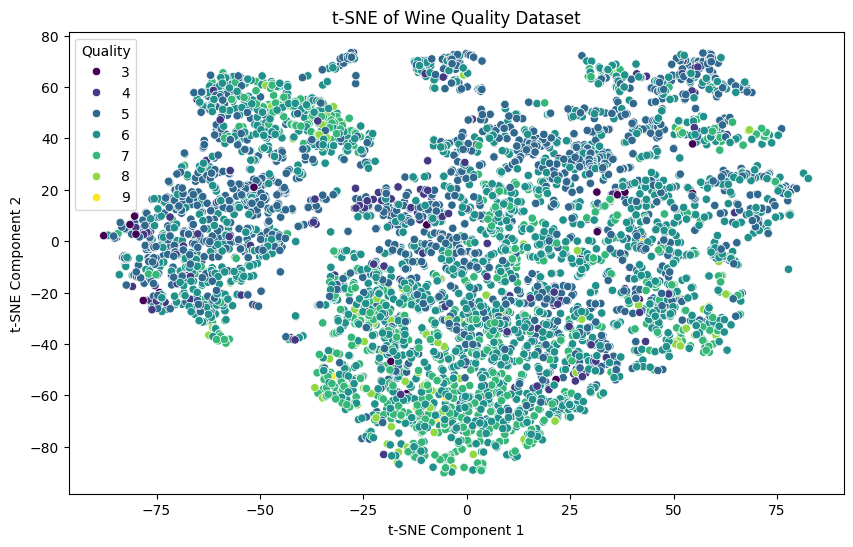

In [3]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_df)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['quality'] = df['quality']  # Add the target variable for coloring

# Plotting t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='quality', data=tsne_df, palette='viridis')
plt.title('t-SNE of Wine Quality Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Quality')
plt.show()


## **Comparison of PCA and t-SNE Visualizations**

The following analysis compares the results of applying **PCA** and **t-SNE** on the Wine Quality dataset.

### **Observations from PCA**
- PCA projects high-dimensional data onto the first two principal components, explaining **27.5% and 22.7% of the variance**.
- Data points appear **concentrated in the center** with a slight spread along the principal components.
- There is **some overlap** and **no clear separation** of wine quality levels.
- The structure appears **linear**, which is expected since PCA is a **linear transformation**.

### **Observations from t-SNE**
- t-SNE provides a **nonlinear representation**, forming **distinct clusters** in the dataset.
- It **preserves local relationships** more effectively than PCA.
- The wine quality levels are **more separated** compared to PCA.
- The spread of data points is more **complex and nonlinear**, indicating that t-SNE captures relationships PCA does not.

---

## **Interpretation and Trade-offs**

| **Method** | **Advantages** | **Disadvantages** |
|------------|---------------|-------------------|
| **PCA** | Preserves **global structure**, computationally efficient, interpretable due to variance explanation | Assumes **linear relationships**, may not capture complex structures |
| **t-SNE** | Preserves **local structures**, better clustering, useful for visualization | Computationally expensive, does not preserve global structure, results can vary with hyperparameters |

### **Key Takeaways**
1. **PCA is useful for feature reduction**, maintaining interpretability while summarizing variance.
2. **t-SNE is better for visualization and clustering**, capturing **nonlinear relationships** and **separating data points effectively**.
3. If the goal is **classification or clustering analysis**, **t-SNE** is more effective.
4. If the goal is **dimensionality reduction for further modeling**, **PCA** is a better choice.



The trade-offs between PCA and t-SNE

| Feature                     | PCA                                      | t-SNE                                   |
|-----------------------------|------------------------------------------|-----------------------------------------|
| **Methodology**             | Linear dimensionality reduction          | Non-linear dimensionality reduction     |
| **Interpretability**        | Easy to interpret; principal components are linear combinations of features | Difficult to interpret; axes do not correspond to original features |
| **Computational Complexity**| Efficient; scales well with large datasets | Computationally intensive; slower for large datasets |
| **Handling of Clusters**    | Preserves global structure; may overlap clusters | Excels at revealing clusters; focuses on local structure |
| **Parameter Sensitivity**   | Fewer parameters to tune                 | Sensitive to hyperparameters (e.g., perplexity) |


## Variance Contribution of Principal Components
The explained variance represents the proportion of the dataset's total variance accounted for by each principal component.

# Trade-off Between Dimensionality Reduction and Information Loss

## Retaining Fewer Components (Dimensionality Reduction)

1.⁠ ⁠Reduces dataset complexity.
2.⁠ ⁠Improves computational efficiency.
3.⁠ ⁠Useful for visualization (e.g., reducing to 2D or 3D).
4.⁠ ⁠Some variance (information) is lost, impacting accuracy.

## Keeping More Components (Minimizing Information Loss)

1.⁠ ⁠Preserves more variance, leading to higher accuracy in machine learning models.
2.⁠ ⁠Increased computational cost and model complexity.
3.⁠ ⁠Harder to visualize and interpret.

## Finding the Optimal Balance

1.⁠ ⁠Typically, 95% variance retention is a good compromise.
2.⁠ ⁠If fewer components retain most of the variance, reducing dimensions is beneficial.
3.⁠ ⁠If variance drops sharply after the first few components, higher dimensions are necessary.